In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

In [38]:
df=pd.read_csv('datos/coches_EDA.csv', index_col=0)
df.head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,16500


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


>Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


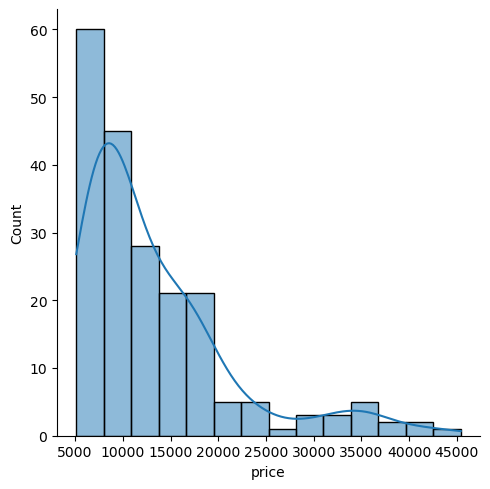

In [39]:
sns.displot(df['price'], kde=True)  #Nuestra variable respuesta no sigue una distribución normal, por lo que vamos a normalizar sus datos.
plt.show();

- Manualmente

In [40]:
media=df['price'].mean()
max=df['price'].max()
min=df['price'].min()

In [41]:
df['price_NORM']=(df['price']-media)/(max-min)

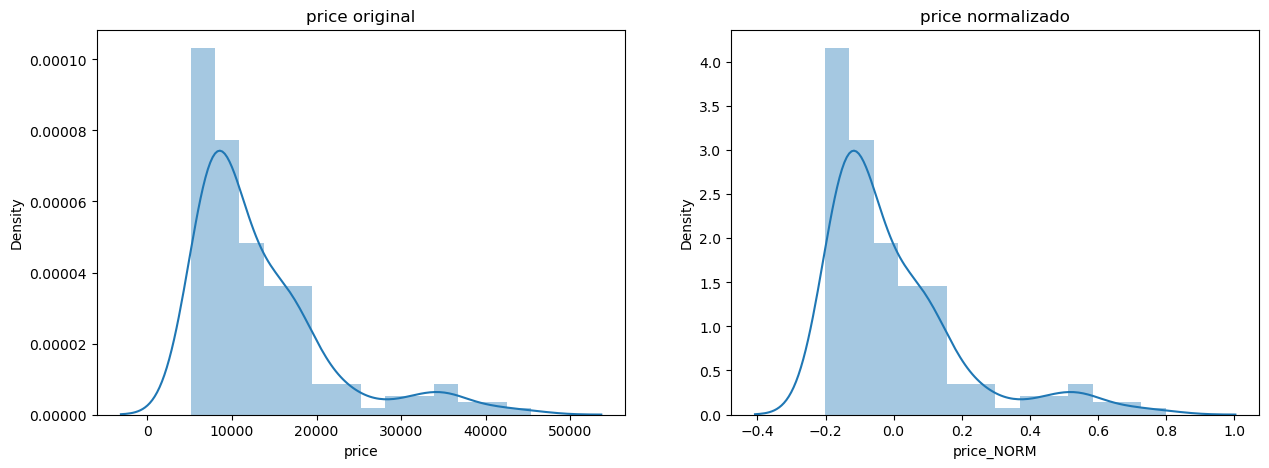

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["price_NORM"], ax = axes[1])
plt.show();

In [43]:
stats.shapiro(df["price_NORM"])

ShapiroResult(statistic=0.8023844361305237, pvalue=2.873204578513551e-15)

>Tal como muestra el test de Shapiro y los gráficos, los datos con este método siguen sin tener una distribución nomal. Seguimos intentando con otros métodos. 

- Logaritmo

In [44]:
df["price_LOG"] = df["price"].apply(lambda x: np.log(x) if x > 0 else 0)

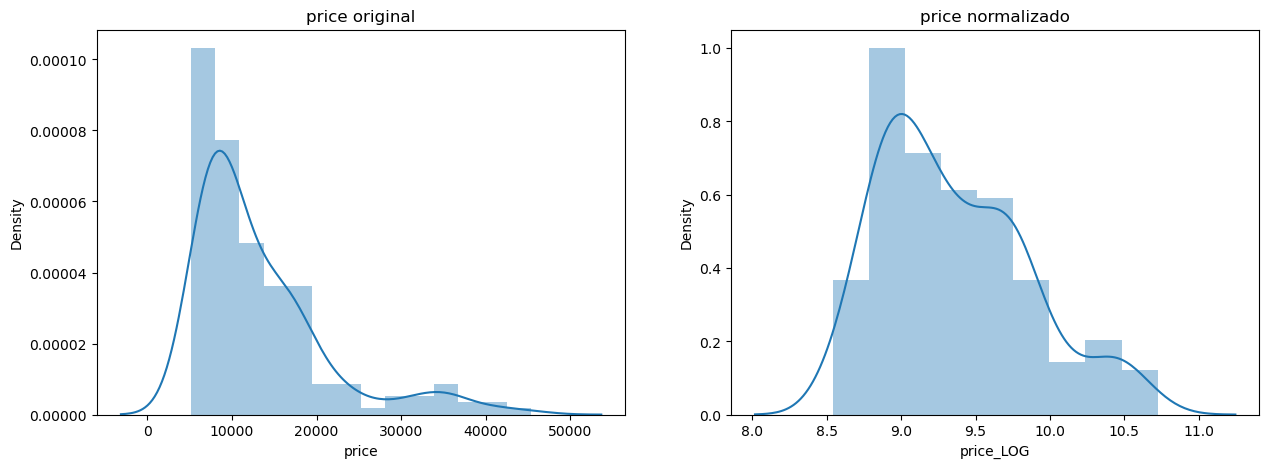

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["price_LOG"], ax = axes[1])
plt.show();

In [46]:
stats.shapiro(df["price_LOG"])

ShapiroResult(statistic=0.9500959515571594, pvalue=1.730966687318869e-06)

>Tal como muestra el test de Shapiro y los gráficos, los datos con este método siguen sin tener una distribución nomal, aunque ya se muestran diferente. Seguimos intentando con otros métodos. 

- Raíz cuadrada

In [47]:
df["price_RAIZ"] = df["price"].apply(lambda x: math.sqrt(x))

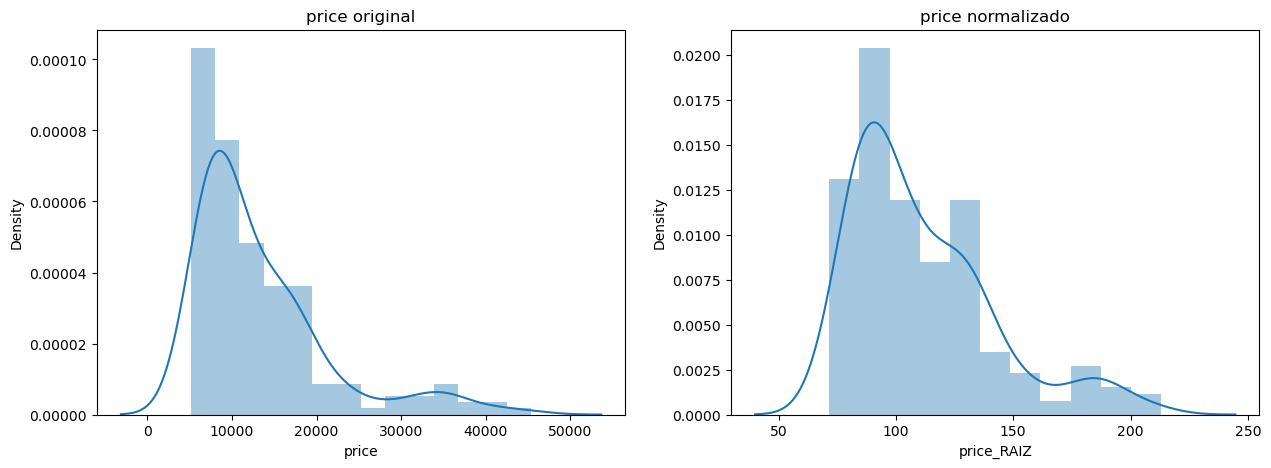

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["price_RAIZ"], ax = axes[1])
plt.show();

In [49]:
stats.shapiro(df["price_RAIZ"])

ShapiroResult(statistic=0.8900328278541565, pvalue=5.232080393935412e-11)

>Tal como muestra el test de Shapiro y los gráficos, los datos con este método siguen sin tener una distribución nomal. Seguimos intentando con otros métodos. 

- Boxcox

In [50]:
df['price_BOX'], lambda_ajustada = stats.boxcox(df['price'])
lambda_ajustada

-0.6189854687308017

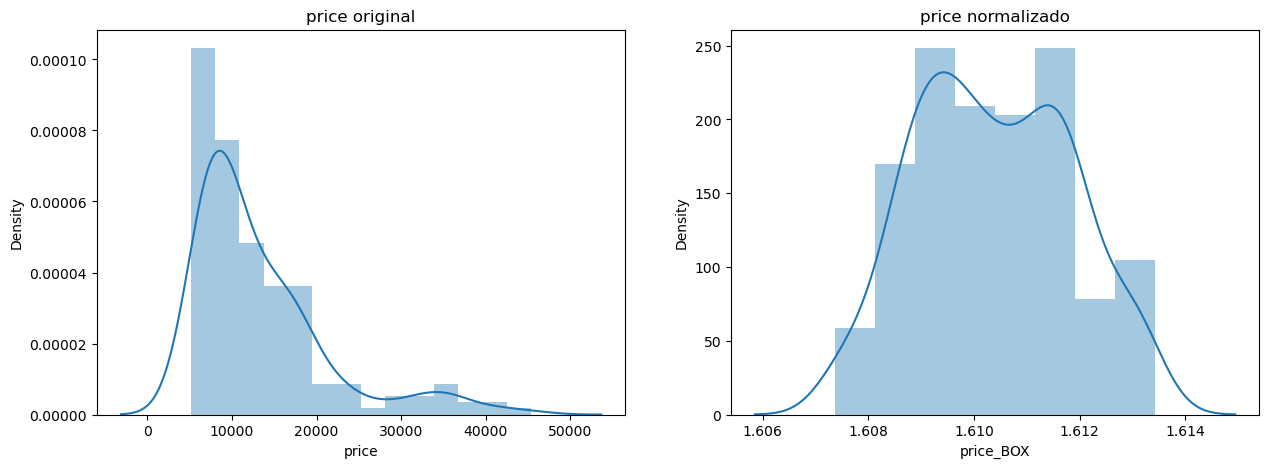

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["price_BOX"], ax = axes[1])
plt.show();

In [52]:
stats.shapiro(df["price_BOX"])

ShapiroResult(statistic=0.9784690737724304, pvalue=0.00340268830768764)

>En el gráfico con el método boxcox observamos que la distribución se asemeja mucho mas a una distribución normal. Según el test de Shapiro, confirmamos que sí se han normalizado con este método. Probamos el último para ver si se asemejan aún más a una distribución normal.

- Sklearn MinMaxScaller

In [53]:
minmax=MinMaxScaler()

In [54]:
minmax.fit(df[['price']])

MinMaxScaler()

In [55]:
X_normalizada=minmax.transform(df[['price']])

In [56]:
price_minmax=pd.DataFrame(X_normalizada,columns=['sklearn_price'])

In [57]:
df['sklearn_price']=price_minmax

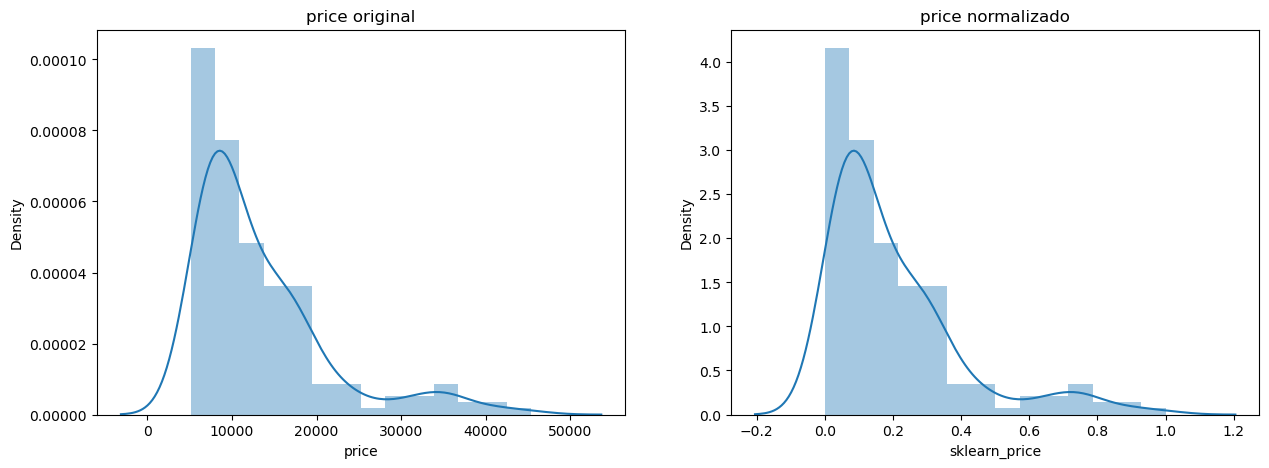

In [58]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["sklearn_price"], ax = axes[1])
plt.show();

In [59]:
stats.shapiro(df["sklearn_price"])

ShapiroResult(statistic=0.8023843765258789, pvalue=2.8731937788434737e-15)

>Tal como muestra el test de Shapiro y los gráficos, los datos con este método no muestran una distribución nomal. 

>Después de haber estudiado los diferentes métodos, decidimos quedarnos con la columna del precio normalizado con boxcox. Borramos las demás columnas que no nos han servido para normalizar los datos.

In [61]:
df.drop(['price_NORM','price_LOG','price_RAIZ','sklearn_price'],axis=1, inplace=True)

In [62]:
df.head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_BOX
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,13495,1.611061
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,16500,1.611586


>Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [64]:
df.to_csv('datos/coches_normalizacion.csv')